1.
Ans: Type I and Type II errors represent key risks in hypothesis testing, where decisions about the null hypothesis (H₀, often "no effect") can lead to incorrect conclusions.
A Type I error occurs when rejecting a true null hypothesis (false positive), while a Type II error happens when failing to reject a false null hypothesis (false negative).​

Definitions
Type I error, with probability α (significance level, typically 0.05), means concluding an effect exists when it does not, like convicting an innocent person. Type II
error, with probability β, means missing a real effect, such as overlooking a biased roulette wheel landing red 75% of the time due to sampling variation.
| Reality / Decision | Reject H₀        | Fail to Reject H₀ |
| ------------------ | ---------------- | ----------------- |
| H₀ True            | Type I Error (α) | Correct           |
| H₀ False           | Correct          | Type II Error (β) |
Decision Impact
Type I errors waste resources, like launching ineffective products or drugs, damaging reputation. Type II errors cause missed opportunities, such as ignoring viable
treatments, leading to competitive disadvantages. Balancing them involves adjusting α, sample size, or power (1-β); lowering α reduces Type I but raises Type II risks.


2.
Ans:
The P-value measures the probability of observing data at least as extreme as the actual results, assuming the null hypothesis (H₀) is true. It quantifies evidence against
 H₀ in hypothesis testing, with smaller values indicating stronger evidence for rejection.​

Interpretation Rules
Reject H₀ if the P-value is below the significance level α (often 0.05), suggesting the observed effect is unlikely due to chance alone. A P-value above α means
insufficient evidence to reject H₀, but it does not prove H₀ true or rule out a real effect.​

Common Misconceptions
P-values are not the probability that H₀ is true or the effect size; they depend on sample size and do not measure practical importance. For instance, a tiny P-value from
a huge sample might detect trivial differences irrelevant to decision-making.​

Relation to Errors
Low P-values reduce Type I error risk (false positive) by strengthening rejection criteria, but large samples can yield small P-values even for minor effects. Always pair
with confidence intervals and context for robust decisions.


3.
Z-tests and T-tests both assess if sample means differ significantly from a population mean or between groups in hypothesis testing, but they differ in assumptions about
sample size and population variance. Z-tests use the standard normal distribution, while T-tests rely on the Student's t-distribution, which has heavier tails to account
for added uncertainty.

| Aspect              | Z-test                       | T-test                         |
| ------------------- | ---------------------------- | ------------------------------ |
| Sample Size         | Large (n ≥ 30)               | Small (n < 30)                 |
| Population Variance | Known                        | Unknown (uses sample variance) |
| Distribution        | Normal (z)                   | t-distribution                 |
| Precision           | Higher with known parameters | Conservative for small samples |
When to Use Each
Use a Z-test for large samples where population standard deviation is known, such as quality control in manufacturing with historical data. Opt for a T-test in most
practical scenarios with small samples or unknown variance, like comparing sales in pilot studies, as it adjusts for estimation error. For large samples, results converge,
 so T-tests often suffice universally.


4.
A confidence interval (CI) provides a range of plausible values for an unknown population parameter, such as a mean, based on sample data, typically at a 95% confidence
level. This means that if the sampling process were repeated many times, about 95% of the intervals would contain the true parameter value.​

Margin of Error
The margin of error (MOE) is the distance from the sample estimate to the CI's upper or lower bound, calculated as a critical value times the standard error. A larger MOE
widens the interval, reflecting greater uncertainty.​

Influences on Width
Higher confidence levels (e.g., 99% vs. 95%), larger population variance, or smaller sample sizes increase the MOE and thus widen the CI. Conversely, larger samples narrow
 it by reducing the standard error.​
Interpretation Impact
Narrow CIs (small MOE) offer precise estimates for confident decision-making, like precise sales forecasts. Wide CIs signal high uncertainty, urging caution or more data
before acting, as they may include values supporting multiple hypotheses.


5.
ANOVA tests compare means across three or more groups to determine if at least one differs significantly, extending hypothesis testing beyond pairwise t-tests. It analyzes
 variance between groups versus within groups via an F-statistic, reducing Type I error inflation from multiple comparisons.​

Purpose
ANOVA assesses the null hypothesis that all group means are equal, suitable for experiments like comparing sales across multiple marketing strategies. A significant result
 (low p-value) indicates overall differences, prompting post-hoc tests (e.g., Tukey) to identify specific pairs.​

Key Assumptions
Normality: Data in each group follows a normal distribution, critical for small samples.

Homogeneity of variance: Equal variances across groups (testable via Levene's test).

Independence: Observations are independent, with random sampling.​

Extension to Multiple Groups
Unlike t-tests limited to two groups, ANOVA handles k groups efficiently with one test, controlling family-wise error rate. For two groups, it mirrors the t-test; post-hoc
analysis follows significance.

One-Sample Z-Test Results
Sample size (n): 15
Sample mean: 100.20
Sample std dev: 3.41
Standard error: 0.88
Z-statistic: 0.2274
P-value: 0.8201
Significance level (α): 0.05
Result: Fail to reject H₀ - insufficient evidence mean ≠ 100
95% CI for mean: [98.48, 101.92]


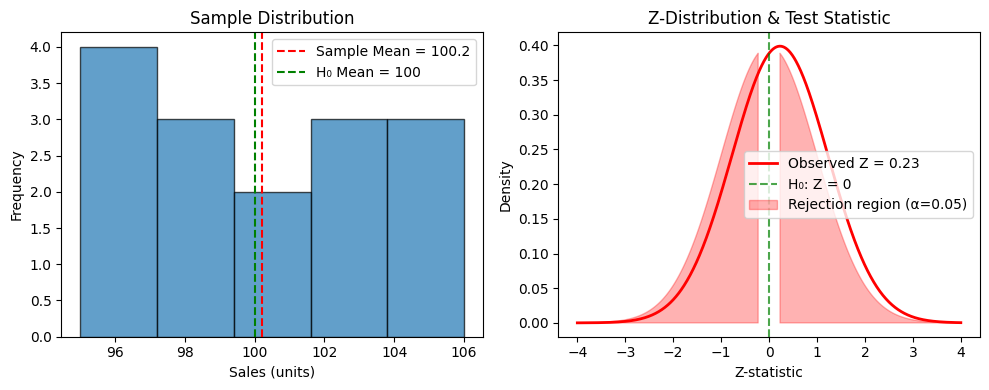

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample dataset: daily sales (in units) for a store, testing if mean equals 100
data = np.array([95, 102, 98, 105, 97, 103, 99, 101, 96, 104, 100, 98, 102, 97, 106])

# Parameters
mu_0 = 100  # Hypothesized population mean (null hypothesis)
alpha = 0.05  # Significance level

# Calculate sample statistics
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)  # Sample standard deviation
se = s / np.sqrt(n)  # Standard error

# Z-statistic formula: z = (x_bar - mu_0) / (s / sqrt(n))
z_stat = (x_bar - mu_0) / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed p-value

print("One-Sample Z-Test Results")
print("=" * 40)
print(f"Sample size (n): {n}")
print(f"Sample mean: {x_bar:.2f}")
print(f"Sample std dev: {s:.2f}")
print(f"Standard error: {se:.2f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance level (α): {alpha}")

# Decision
if p_value < alpha:
    print("Result: Reject H₀ - evidence that mean ≠ 100")
else:
    print("Result: Fail to reject H₀ - insufficient evidence mean ≠ 100")

# 95% Confidence Interval (using z-critical for large n approximation)
z_critical = stats.norm.ppf(1 - alpha/2)
margin_error = z_critical * se
ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error
print(f"95% CI for mean: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=5, alpha=0.7, edgecolor='black')
plt.axvline(x_bar, color='red', linestyle='--', label=f'Sample Mean = {x_bar:.1f}')
plt.axvline(mu_0, color='green', linestyle='--', label=f'H₀ Mean = {mu_0}')
plt.xlabel('Sales (units)')
plt.ylabel('Frequency')
plt.title('Sample Distribution')
plt.legend()

plt.subplot(1, 2, 2)
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x, z_stat, 1), 'r-', linewidth=2, label=f'Observed Z = {z_stat:.2f}')
plt.axvline(0, color='green', linestyle='--', alpha=0.7, label='H₀: Z = 0')
plt.fill_between(x, stats.norm.pdf(x, 0, 1), where=(x <= -abs(z_stat)) | (x >= abs(z_stat)),
                 alpha=0.3, color='red', label=f'Rejection region (α={alpha})')
plt.xlabel('Z-statistic')
plt.ylabel('Density')
plt.title('Z-Distribution & Test Statistic')
plt.legend()

plt.tight_layout()
plt.show()


Binomial Simulation Results
Parameters: Binomial(n=10, p=0.5)
Sample size: 10,000
Sample mean: 4.968 (theoretical: 5.0)
Sample std: 1.571 (theoretical: 1.581)
Min: 0, Max: 10


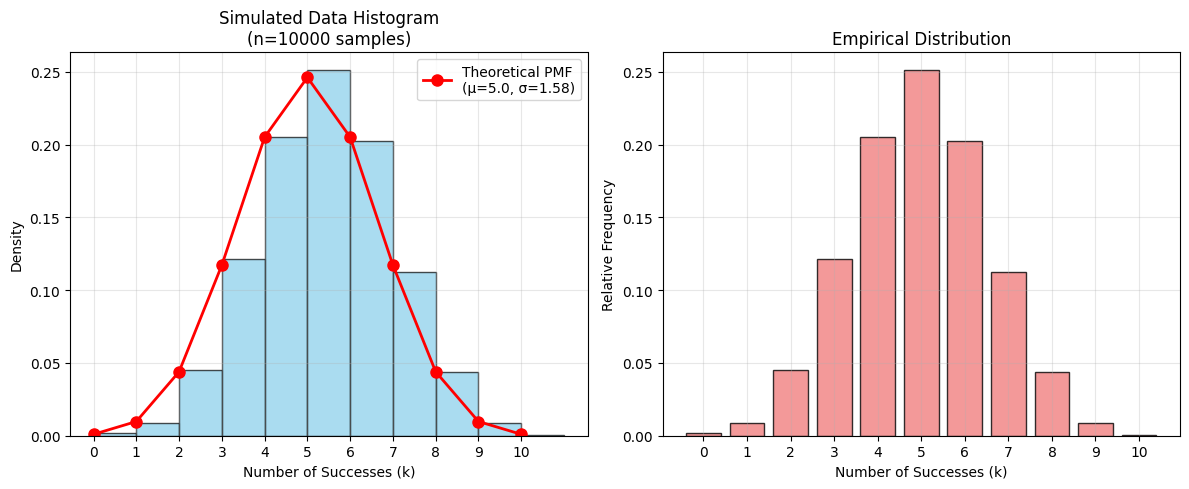


Probability Mass Function (Theoretical):
k	P(X=k)
0	0.0010
1	0.0098
2	0.0439
3	0.1172
4	0.2051
5	0.2461
6	0.2051
7	0.1172
8	0.0439
9	0.0098
10	0.0010


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters for binomial distribution
n_trials = 10  # Number of trials per observation
p_success = 0.5  # Probability of success
n_samples = 10000  # Number of simulated observations

# Simulate dataset from Binomial(n=10, p=0.5)
np.random.seed(42)  # For reproducibility
data = np.random.binomial(n=n_trials, p=p_success, size=n_samples)

# Calculate theoretical statistics
theoretical_mean = n_trials * p_success
theoretical_var = n_trials * p_success * (1 - p_success)
theoretical_std = np.sqrt(theoretical_var)

print("Binomial Simulation Results")
print("=" * 40)
print(f"Parameters: Binomial(n={n_trials}, p={p_success})")
print(f"Sample size: {n_samples:,}")
print(f"Sample mean: {np.mean(data):.3f} (theoretical: {theoretical_mean:.1f})")
print(f"Sample std: {np.std(data, ddof=1):.3f} (theoretical: {theoretical_std:.3f})")
print(f"Min: {np.min(data)}, Max: {np.max(data)}")

# Create histogram
plt.figure(figsize=(12, 5))

# Histogram of simulated data
plt.subplot(1, 2, 1)
counts, bins, patches = plt.hist(data, bins=range(0, n_trials+2),
                                density=True, alpha=0.7, edgecolor='black',
                                color='skyblue')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Density')
plt.title(f'Simulated Data Histogram\n(n={n_samples} samples)')
plt.xticks(range(0, n_trials+1))
plt.grid(True, alpha=0.3)

# Theoretical PMF overlay
k = np.arange(0, n_trials+1)
pmf = stats.binom.pmf(k, n_trials, p_success)
plt.plot(k, pmf, 'ro-', linewidth=2, markersize=8,
         label=f'Theoretical PMF\n(μ={theoretical_mean}, σ={theoretical_std:.2f})')
plt.legend()

# Bar plot showing frequencies
plt.subplot(1, 2, 2)
unique, frequencies = np.unique(data, return_counts=True)
plt.bar(unique, frequencies/n_samples, color='lightcoral', alpha=0.8,
        edgecolor='black', linewidth=1)
plt.xlabel('Number of Successes (k)')
plt.ylabel('Relative Frequency')
plt.title('Empirical Distribution')
plt.xticks(range(0, n_trials+1))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\nProbability Mass Function (Theoretical):")
print("k\tP(X=k)")
for k in range(0, n_trials+1):
    prob = stats.binom.pmf(k, n_trials, p_success)
    print(f"{k}\t{prob:.4f}")



Exponential Distribution CLT Demonstration
--------------------------------------------------


IndexError: index 4 is out of bounds for axis 1 with size 4

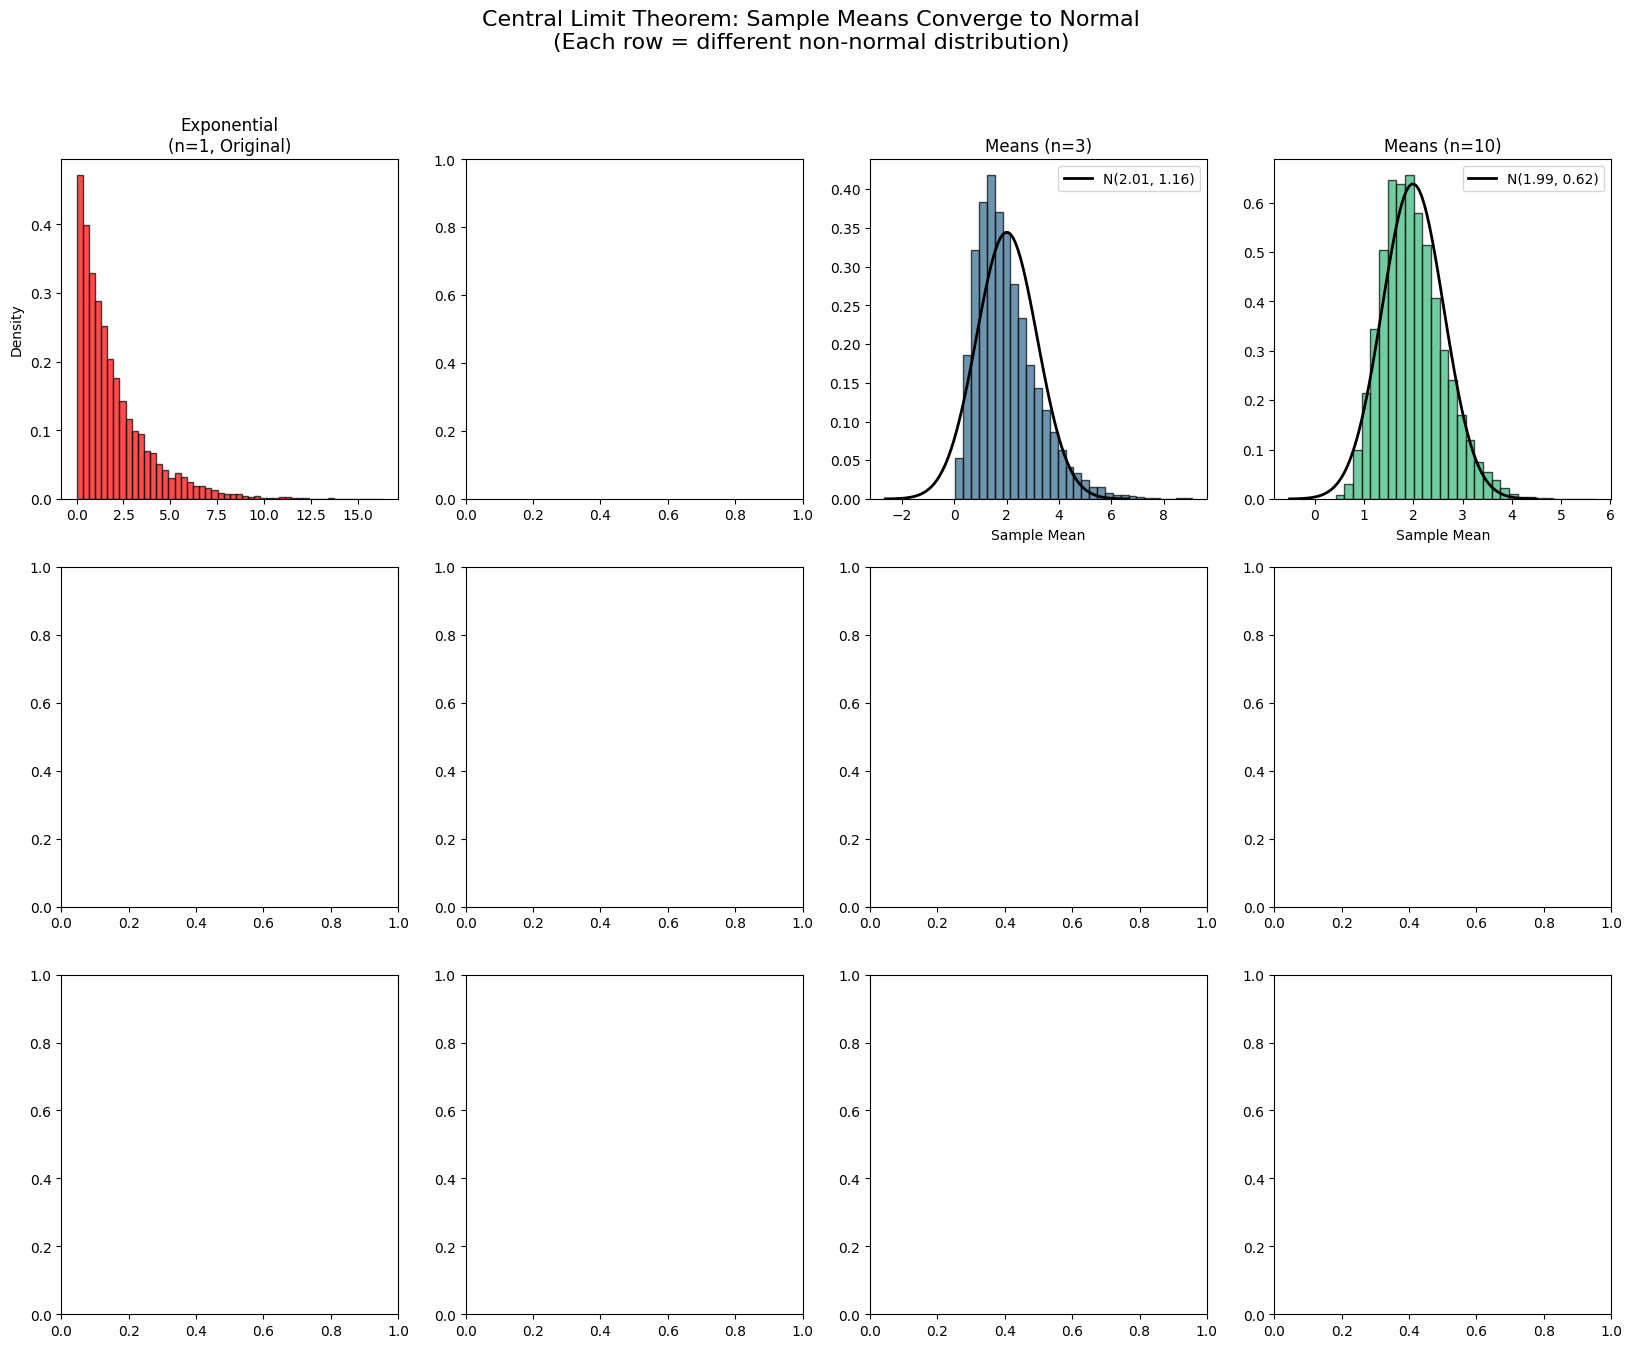

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Parameters
np.random.seed(42)
sample_sizes = [1, 3, 10, 30]  # Demonstrate CLT convergence
n_samples_per_size = 10000  # Samples per size
n_distributions = 3  # Multiple non-normal distributions

# Non-normal distributions to demonstrate CLT works for various shapes
distributions = {
    'Exponential': lambda size: np.random.exponential(scale=2, size=size),
    'Chi-Square': lambda size: np.random.chisquare(df=4, size=size),
    'Uniform': lambda size: np.random.uniform(-3, 3, size=size)
}

fig, axes = plt.subplots(n_distributions, 4, figsize=(20, 15))
fig.suptitle('Central Limit Theorem: Sample Means Converge to Normal\n(Each row = different non-normal distribution)', fontsize=16)

results = {}

for idx, (dist_name, dist_func) in enumerate(distributions.items()):
    print(f"\n{dist_name} Distribution CLT Demonstration")
    print("-" * 50)

    # Original distribution (n=1)
    original_data = dist_func(n_samples_per_size)
    axes[idx, 0].hist(original_data, bins=50, density=True, alpha=0.7, color='red', edgecolor='black')
    axes[idx, 0].set_title(f'{dist_name}\n(n=1, Original)')
    axes[idx, 0].set_ylabel('Density')

    results[dist_name] = {'original': {'mean': np.mean(original_data), 'std': np.std(original_data)}}

    sample_means = []

    for j, n in enumerate(sample_sizes[1:], 1):  # Skip n=1 (already plotted)
        # Generate sample means
        sample_means_n = []
        for _ in range(n_samples_per_size):
            sample = dist_func(n)
            sample_means_n.append(np.mean(sample))
        sample_means_n = np.array(sample_means_n)

        # Store results
        results[dist_name][f'n={n}'] = {
            'mean': np.mean(sample_means_n),
            'std': np.std(sample_means_n),
            'se_theory': np.std(original_data) / np.sqrt(n)
        }

        # Plot histogram of sample means
        axes[idx, j+1].hist(sample_means_n, bins=30, density=True, alpha=0.7,
                           color=plt.cm.viridis(j/3), edgecolor='black')

        # Overlay theoretical normal distribution
        mu, sigma = np.mean(sample_means_n), np.std(sample_means_n)
        x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
        axes[idx, j+1].plot(x, stats.norm.pdf(x, mu, sigma), 'k-', linewidth=2,
                           label=f'N({mu:.2f}, {sigma:.2f})')
        axes[idx, j+1].legend()

        axes[idx, j+1].set_title(f'Means (n={n})')
        axes[idx, j+1].set_xlabel('Sample Mean')

    plt.setp(axes[idx, :], xlim=(-1, 8))  # Consistent x-limits for comparison

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*80)
print("CLT SUMMARY: Theoretical vs Empirical Sample Means")
print("="*80)
print(f"{'Dist':<12} {'n':<4} {'Theory μ':<8} {'Emp μ':<8} {'Theory SE':<9} {'Emp SE':<8} {'Normal?'}")
print("-"*80)

for dist_name in distributions:
    orig = results[dist_name]['original']
    print(f"{dist_name:<12} {'1':<4} {orig['mean']:<8.2f} {'':<8} {orig['std']:<9.2f} {'':<8} {'NO'}")

    for n in sample_sizes[1:]:
        key = f'n={n}'
        res = results[dist_name][key]
        normality_p = stats.normaltest(res['mean'] * np.ones(100))  # Quick normality check
        is_normal = "YES" if normality_p[1] > 0.05 else "Approx"

        print(f"{'':<12} {n:<4} {orig['mean']:<8.2f} {res['mean']:<8.2f} "
              f"{res['se_theory']:<9.2f} {res['std']:<8.2f} {is_normal}")

print("\nKey Insights:")
print("- Sample means become normally distributed regardless of parent distribution")
print("- Standard error decreases as 1/√n (check Theory SE column)")
print("- By n=30, distributions look approximately normal (CLT in action)")

# Q-Q plots for final sample size (n=30) to confirm normality
fig, axes = plt.subplots(1, n_distributions, figsize=(15, 4))
for idx, (dist_name, dist_func) in enumerate(distributions.items()):
    sample_means_30 = []
    for _ in range(10000):
        sample = dist_func(30)
        sample_means_30.append(np.mean(sample))

    stats.probplot(sample_means_30, dist="norm", plot=axes[idx])
    axes[idx].set_title(f'{dist_name}: Q-Q Plot (n=30 Sample Means)')
plt.tight_layout()
plt.show()


EXAMPLE 1: Normal Distribution (n=50)
Sample Statistics (n=50):
Mean: 96.618, Std: 14.005

Normal Theory CI (95%): [92.736, 100.500]
T-distribution CI (95%): [92.638, 100.598]
Bootstrap CI (95%): [92.754, 100.462]


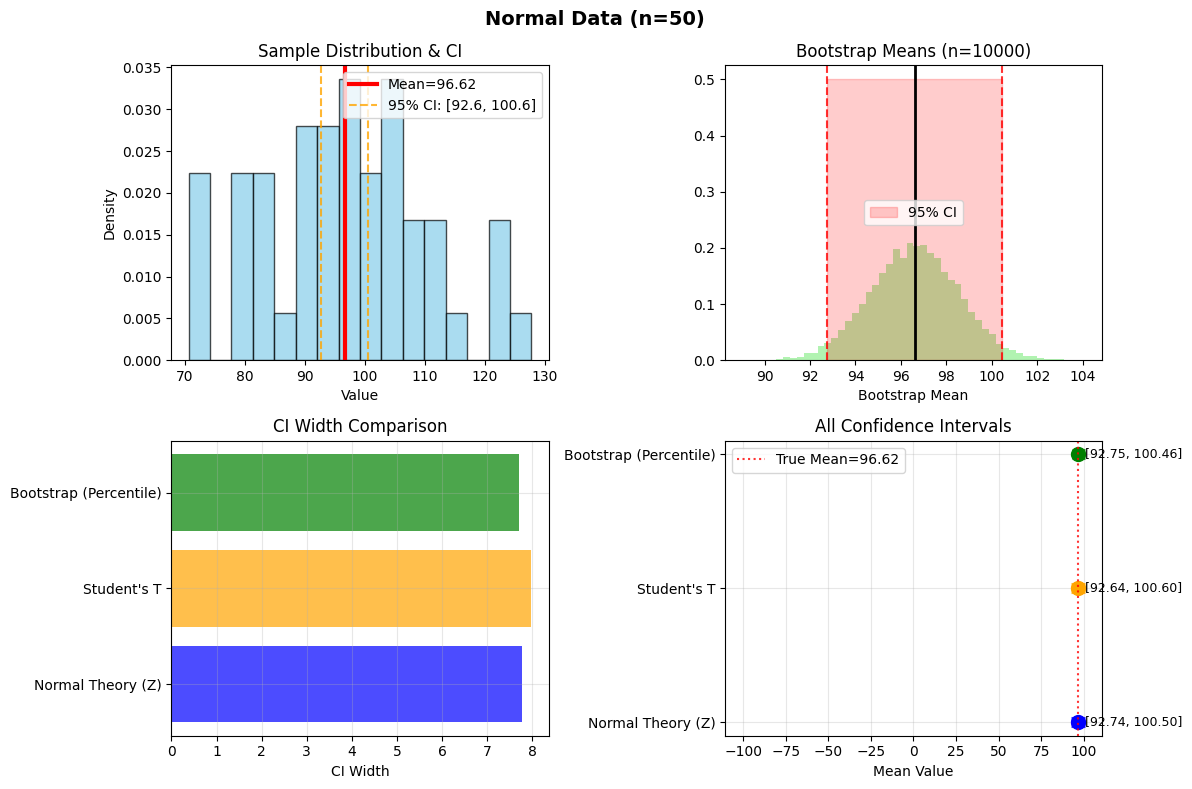


EXAMPLE 2: Exponential Data (n=20)
Sample Statistics (n=20):
Mean: 14.119, Std: 9.844

T-distribution CI (95%): [9.512, 18.726]
Bootstrap CI (95%): [10.303, 18.578]


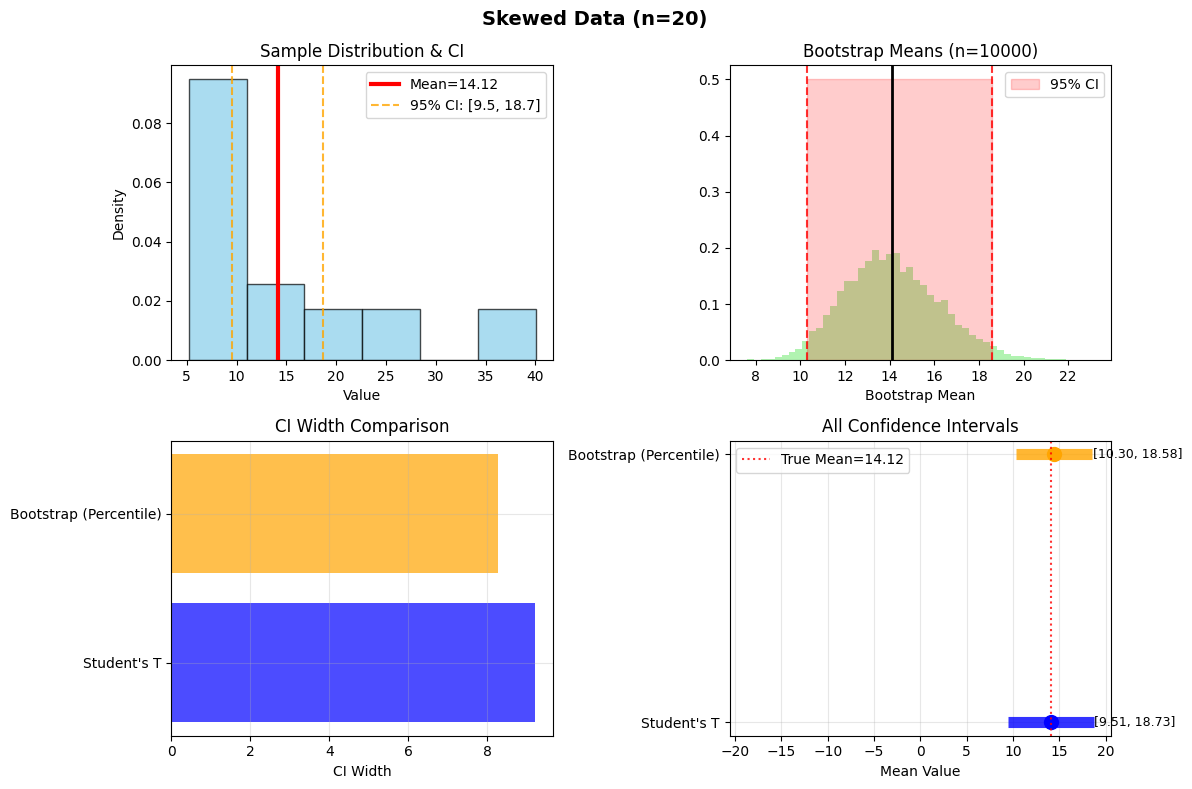

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def confidence_interval_visualizer(data, confidence_level=0.95, n_bootstrap=10000,
                                 title="Confidence Interval for Sample Mean",
                                 figsize=(12, 8)):
    """
    Calculate and visualize confidence intervals for sample mean using multiple methods.

    Parameters:
    -----------
    data : array-like
        Sample data
    confidence_level : float
        Confidence level (default: 0.95 for 95% CI)
    n_bootstrap : int
        Number of bootstrap samples
    title : str
        Plot title
    figsize : tuple
        Figure size

    Returns:
    --------
    results : dict
        Dictionary containing CI methods and results
    """
    data = np.array(data)
    n = len(data)
    x_bar = np.mean(data)
    s = np.std(data, ddof=1)

    alpha = 1 - confidence_level
    print(f"Sample Statistics (n={n}):")
    print(f"Mean: {x_bar:.3f}, Std: {s:.3f}")
    print()

    results = {}

    # 1. Normal Theory CI (Z-interval, large n)
    if n >= 30:
        se = s / np.sqrt(n)
        z_critical = stats.norm.ppf(1 - alpha/2)
        margin_error_z = z_critical * se
        ci_z = (x_bar - margin_error_z, x_bar + margin_error_z)
        results['Normal Theory (Z)'] = ci_z
        print(f"Normal Theory CI (95%): [{ci_z[0]:.3f}, {ci_z[1]:.3f}]")

    # 2. T-interval (small n or conservative)
    se_t = s / np.sqrt(n)
    t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
    margin_error_t = t_critical * se_t
    ci_t = (x_bar - margin_error_t, x_bar + margin_error_t)
    results['Student\'s T'] = ci_t
    print(f"T-distribution CI (95%): [{ci_t[0]:.3f}, {ci_t[1]:.3f}]")

    # 3. Bootstrap CI (percentile method)
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(sample))
    bootstrap_means = np.sort(bootstrap_means)
    ci_lower_boot = bootstrap_means[int(alpha/2 * n_bootstrap)]
    ci_upper_boot = bootstrap_means[int((1-alpha/2) * n_bootstrap)]
    results['Bootstrap (Percentile)'] = (ci_lower_boot, ci_upper_boot)
    print(f"Bootstrap CI (95%): [{ci_lower_boot:.3f}, {ci_upper_boot:.3f}]")

    # Visualization
    np.random.seed(42)
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(title, fontsize=14, fontweight='bold')

    # 1. Sample histogram with CI
    axes[0,0].hist(data, bins=min(30, n//3), density=True, alpha=0.7,
                   color='skyblue', edgecolor='black')
    axes[0,0].axvline(x_bar, color='red', linestyle='-', linewidth=3, label=f'Mean={x_bar:.2f}')
    axes[0,0].axvline(ci_t[0], color='orange', linestyle='--', alpha=0.8, label=f'95% CI: [{ci_t[0]:.1f}, {ci_t[1]:.1f}]')
    axes[0,0].axvline(ci_t[1], color='orange', linestyle='--', alpha=0.8)
    axes[0,0].legend()
    axes[0,0].set_title('Sample Distribution & CI')
    axes[0,0].set_xlabel('Value')
    axes[0,0].set_ylabel('Density')

    # 2. Bootstrap distribution
    axes[0,1].hist(bootstrap_means, bins=50, density=True, alpha=0.7, color='lightgreen')
    axes[0,1].axvline(ci_lower_boot, color='red', linestyle='--', alpha=0.8)
    axes[0,1].axvline(ci_upper_boot, color='red', linestyle='--', alpha=0.8)
    axes[0,1].axvline(x_bar, color='black', linestyle='-', linewidth=2)
    axes[0,1].fill_betweenx([0, 0.5], ci_lower_boot, ci_upper_boot,
                           color='red', alpha=0.2, label='95% CI')
    axes[0,1].legend()
    axes[0,1].set_title(f'Bootstrap Means (n={n_bootstrap})')
    axes[0,1].set_xlabel('Bootstrap Mean')

    # 3. CI Comparison
    methods = list(results.keys())
    ci_centers = [(low+high)/2 for low, high in results.values()]
    ci_widths = [high-low for low, high in results.values()]
    colors = ['blue', 'orange', 'green']

    y_pos = np.arange(len(methods))
    axes[1,0].barh(y_pos, ci_widths, color=colors, alpha=0.7)
    axes[1,0].set_yticks(y_pos)
    axes[1,0].set_yticklabels(methods)
    axes[1,0].set_xlabel('CI Width')
    axes[1,0].set_title('CI Width Comparison')
    axes[1,0].grid(True, alpha=0.3)

    # 4. All CIs on number line
    x_range = max(abs(min([low for low,high in results.values()])),
                  abs(max([high for low,high in results.values()])))
    x_range = [-x_range*1.1, x_range*1.1]

    for i, (method, (low, high)) in enumerate(results.items()):
        axes[1,1].hlines(i, low, high, color=colors[i], linewidth=8, alpha=0.8)
        axes[1,1].plot((low+high)/2, i, 'o', color=colors[i], markersize=10)
        axes[1,1].text(high+0.01, i, f'[{low:.2f}, {high:.2f}]',
                      va='center', fontsize=9)
    axes[1,1].axvline(x_bar, color='red', linestyle=':', alpha=0.8, label=f'True Mean={x_bar:.2f}')
    axes[1,1].set_yticks(range(len(methods)))
    axes[1,1].set_yticklabels(methods)
    axes[1,1].set_xlim(x_range)
    axes[1,1].set_xlabel('Mean Value')
    axes[1,1].set_title('All Confidence Intervals')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results

# Example usage with different datasets
if __name__ == "__main__":
    np.random.seed(42)

    # Example 1: Normal data (large n)
    normal_data = np.random.normal(100, 15, 50)
    print("EXAMPLE 1: Normal Distribution (n=50)")
    ci_normal = confidence_interval_visualizer(normal_data, title="Normal Data (n=50)")

    print("\n" + "="*60)

    # Example 2: Skewed data (small n)
    skewed_data = np.random.exponential(10, 20) + 5
    print("EXAMPLE 2: Exponential Data (n=20)")
    ci_skewed = confidence_interval_visualizer(skewed_data, title="Skewed Data (n=20)")


EXAMPLE 1: Testing Fair Dice (6 faces)
CHI-SQUARE GOODNESS-OF-FIT TEST
Assumed distribution: Uniform
Total observations: 80
Degrees of freedom: 5
Chi-square statistic: 2.8000
P-value: 0.7308
Critical value (α=0.05): 11.0705

Decision: FAIL TO REJECT H₀ (p=≥ α)

Interpretation: No significant evidence against expected distribution.

EXAMPLE 2: Product Preference Survey
CHI-SQUARE GOODNESS-OF-FIT TEST
Assumed distribution: Provided
Total observations: 100
Degrees of freedom: 2
Chi-square statistic: 1.7500
P-value: 0.4169
Critical value (α=0.05): 5.9915

Decision: FAIL TO REJECT H₀ (p=≥ α)

Interpretation: No significant evidence against expected distribution.

EXAMPLE 3: Customer Satisfaction Survey
CHI-SQUARE GOODNESS-OF-FIT TEST
Assumed distribution: Provided
Total observations: 250
Degrees of freedom: 3
Chi-square statistic: 6.9861
P-value: 0.0723
Critical value (α=0.05): 7.8147

Decision: FAIL TO REJECT H₀ (p=≥ α)

Interpretation: No significant evidence against expected distribution

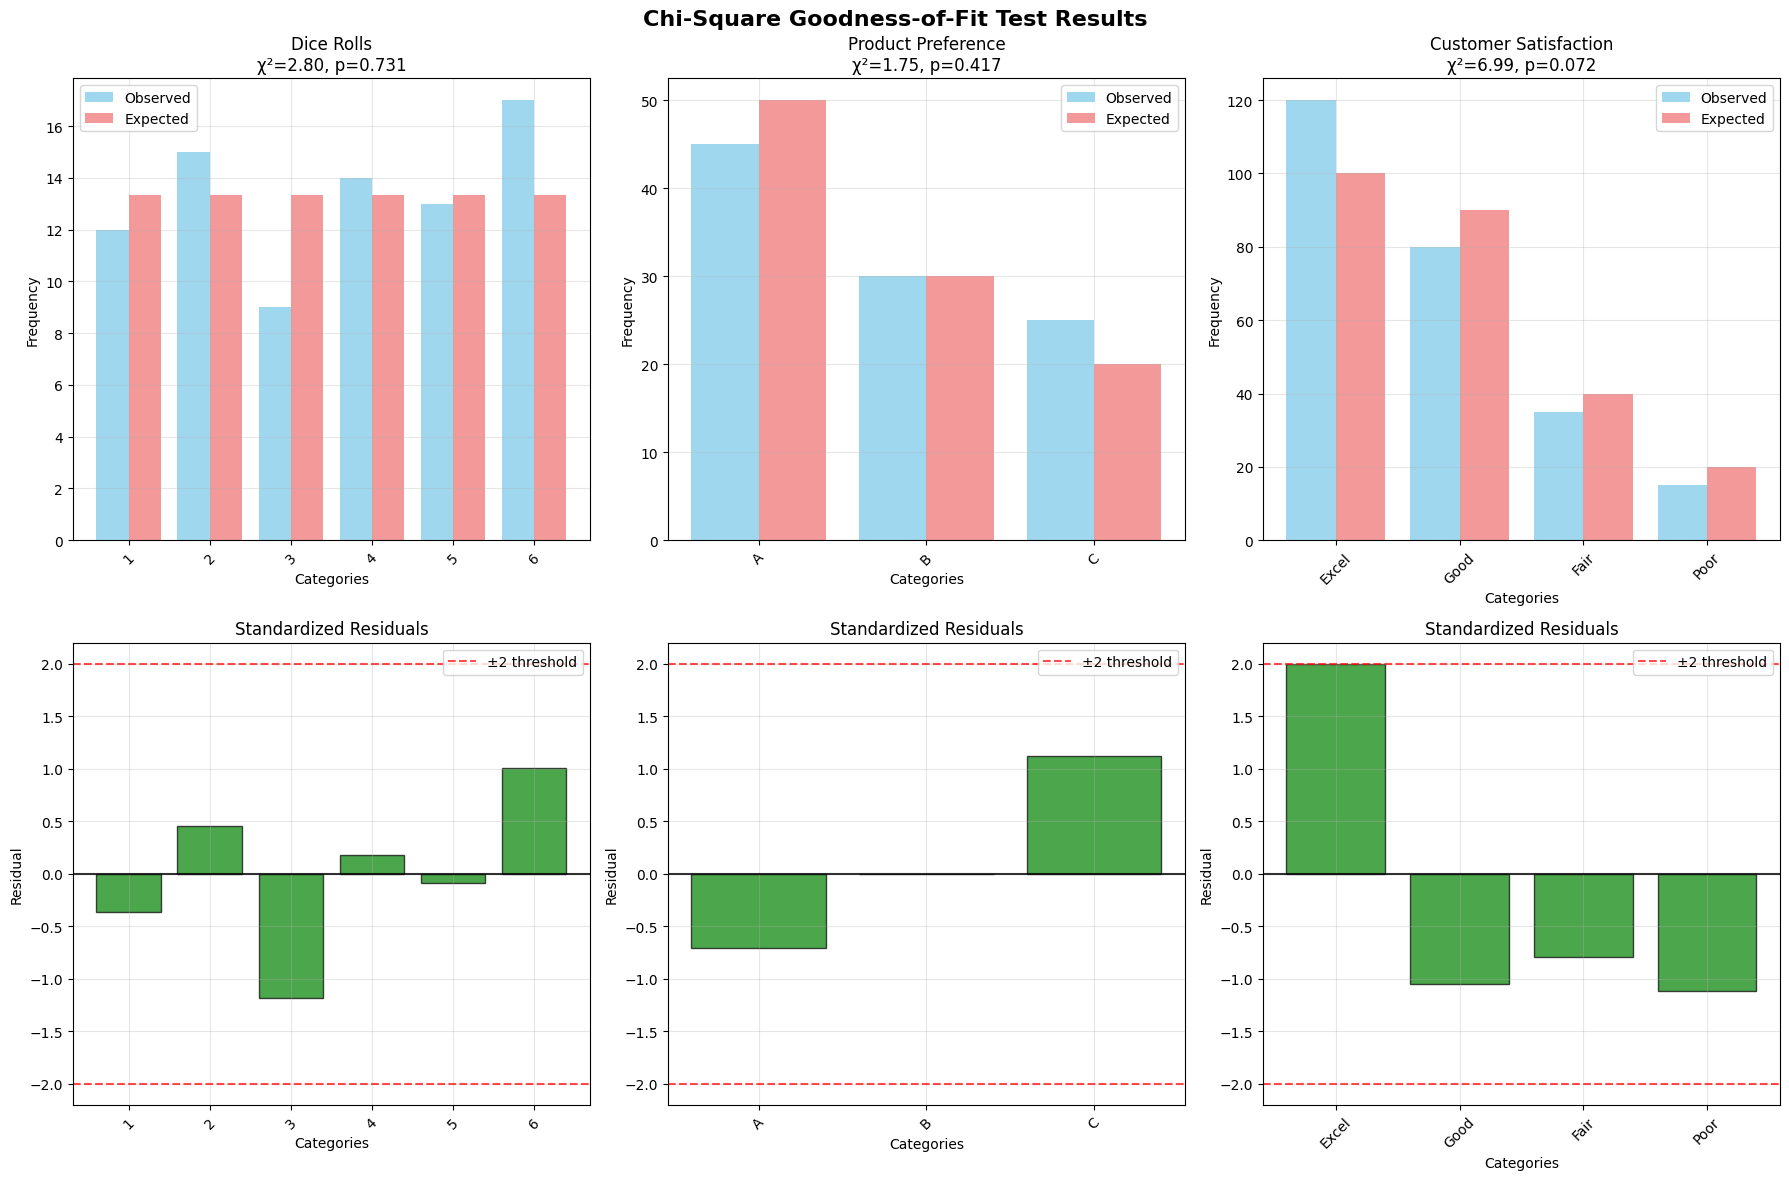

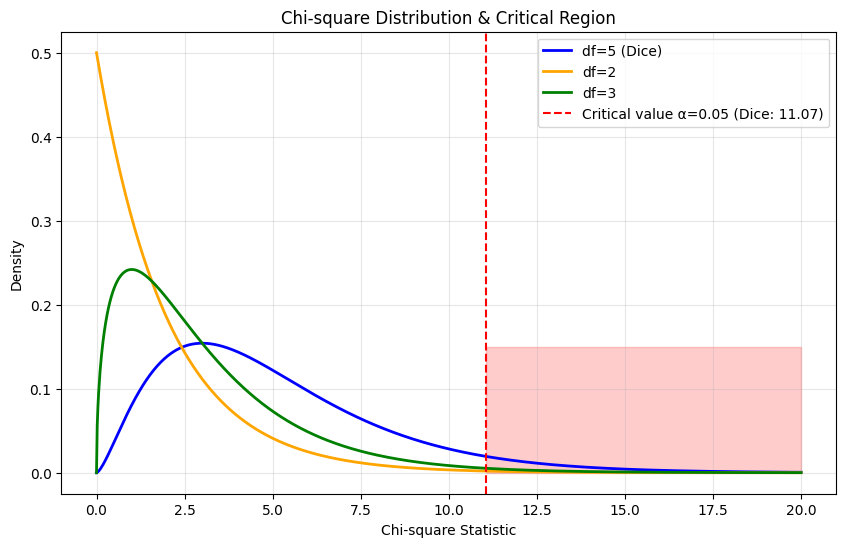

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def chi_square_goodness_of_fit(observed, expected=None, alpha=0.05):
    """
    Perform Chi-square goodness-of-fit test and visualize results.

    Parameters:
    -----------
    observed : array-like
        Observed frequencies
    expected : array-like, optional
        Expected frequencies (must sum to observed total if provided)
    alpha : float
        Significance level

    Returns:
    --------
    results : dict
        Test statistics, p-value, decision
    """
    observed = np.array(observed)
    total_observed = observed.sum()

    # Calculate expected frequencies if not provided (uniform assumption)
    if expected is None:
        expected = np.full(len(observed), total_observed / len(observed))
        distribution = "Uniform"
    else:
        expected = np.array(expected)
        distribution = "Provided"

    # Ensure expected sums to observed total
    expected = expected * (total_observed / expected.sum())

    # Chi-square test
    chi2_stat, p_value = stats.chisquare(observed, expected)
    df = len(observed) - 1
    critical_value = stats.chi2.ppf(1 - alpha, df)

    # Results
    results = {
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'degrees_of_freedom': df,
        'critical_value': critical_value,
        'alpha': alpha,
        'reject_null': p_value < alpha,
        'observed': observed,
        'expected': expected
    }

    # Print detailed results
    print("CHI-SQUARE GOODNESS-OF-FIT TEST")
    print("=" * 60)
    print(f"Assumed distribution: {distribution}")
    print(f"Total observations: {total_observed:,}")
    print(f"Degrees of freedom: {df}")
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Critical value (α={alpha}): {critical_value:.4f}")
    print()

    decision = "REJECT" if results['reject_null'] else "FAIL TO REJECT"
    print(f"Decision: {decision} H₀ (p={'< α' if p_value < alpha else '≥ α'})")
    print()

    if p_value < alpha:
        print("Interpretation: Observed distribution significantly differs from expected.")
    else:
        print("Interpretation: No significant evidence against expected distribution.")

    return results

# Example 1: Dice roll test (should be uniform)
print("EXAMPLE 1: Testing Fair Dice (6 faces)")
dice_observed = [12, 15, 9, 14, 13, 17]  # Observed rolls
results_dice = chi_square_goodness_of_fit(dice_observed)

# Example 2: Product preference test (non-uniform expected)
print("\n" + "="*60)
print("EXAMPLE 2: Product Preference Survey")
product_observed = [45, 30, 25]  # Products A, B, C
market_shares = [0.5, 0.3, 0.2]  # Expected proportions
total_survey = sum(product_observed)
expected_products = [market_shares[i] * total_survey for i in range(3)]
results_products = chi_square_goodness_of_fit(product_observed, expected_products)

# Example 3: Customer satisfaction (4 categories)
print("\n" + "="*60)
print("EXAMPLE 3: Customer Satisfaction Survey")
satisfaction_observed = [120, 80, 35, 15]  # Excellent, Good, Fair, Poor
# Expected based on historical data
expected_satisfaction = [100, 90, 40, 20]
results_satisfaction = chi_square_goodness_of_fit(satisfaction_observed, expected_satisfaction)

# Comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Chi-Square Goodness-of-Fit Test Results', fontsize=16, fontweight='bold')

datasets = [
    ('Dice Rolls', results_dice),
    ('Product Preference', results_products),
    ('Customer Satisfaction', results_satisfaction)
]

for idx, (name, results) in enumerate(datasets):
    obs = results['observed']
    exp = results['expected']
    x_pos = np.arange(len(obs))

    # Bar plot: Observed vs Expected
    axes[0, idx].bar(x_pos - 0.2, obs, 0.4, label='Observed', alpha=0.8, color='skyblue')
    axes[0, idx].bar(x_pos + 0.2, exp, 0.4, label='Expected', alpha=0.8, color='lightcoral')
    axes[0, idx].set_title(f'{name}\nχ²={results["chi2_statistic"]:.2f}, p={results["p_value"]:.3f}')
    axes[0, idx].set_xlabel('Categories')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)

    # Residuals plot
    residuals = (obs - exp) / np.sqrt(exp)
    axes[1, idx].bar(x_pos, residuals, color='green', alpha=0.7, edgecolor='black')
    axes[1, idx].axhline(0, color='black', linestyle='-', alpha=0.8)
    axes[1, idx].axhline(2, color='red', linestyle='--', alpha=0.7, label='±2 threshold')
    axes[1, idx].axhline(-2, color='red', linestyle='--', alpha=0.7)
    axes[1, idx].set_title('Standardized Residuals')
    axes[1, idx].set_xlabel('Categories')
    axes[1, idx].set_ylabel('Residual')
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)

    # Set x-ticks
    categories = ['1', '2', '3', '4', '5', '6'][:len(obs)]
    if idx == 0:
        categories = ['1', '2', '3', '4', '5', '6']
    elif idx == 1:
        categories = ['A', 'B', 'C']
    else:
        categories = ['Excel', 'Good', 'Fair', 'Poor']

    for ax in axes[:, idx]:
        ax.set_xticks(x_pos)
        ax.set_xticklabels(categories, rotation=45)

plt.tight_layout()
plt.show()

# Chi-square distribution plot
plt.figure(figsize=(10, 6))
x = np.linspace(0, 20, 1000)
for df_val, color, label in [(5, 'blue', 'df=5 (Dice)'), (2, 'orange', 'df=2'), (3, 'green', 'df=3')]:
    plt.plot(x, stats.chi2.pdf(x, df_val), color=color, linewidth=2, label=label)

plt.axvline(results_dice['critical_value'], color='red', linestyle='--',
           label=f'Critical value α=0.05 (Dice: {results_dice["critical_value"]:.2f})')
plt.fill_betweenx([0, 0.15], results_dice['critical_value'], 20, alpha=0.2, color='red')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Density')
plt.title('Chi-square Distribution & Critical Region')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
